In [2]:
# basic python pakeg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variables

In [7]:
x = df.drop(columns=['math_score'],axis=1).copy()

In [8]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']

In [10]:
# Create Column Transformer with 3 types of transformers

num_features  = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numaric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler",numaric_transformer, num_features),
    ]
)

In [11]:
X = preprocessor.fit_transform(x)

In [12]:
# separate dataset into train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [21]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.05694554,  0.45733301],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.94779033,  0.98406266],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.35894946,  1.18158627],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

# Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2_scor = r2_score(true,predict)
    
    return(mae,rmse,r2_scor)

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    
}

model_list = []
re_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    
    
    # Make predictions
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test datasets
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error : {:4f}".format(model_train_rmse))
    print(" - Mean Absolute Error : {:4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))
    
    
    print('--------------------------------------------')
    
    print("Model performance for Test set")
    print("- Root Mean Squared Error : {:4f}".format(model_test_rmse))
    print(" - Mean Absolute Error : {:4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    
    re_list.append(model_test_r2)
    
    print('='*50)
    print('\n')
    
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error : 5.325344
 - Mean Absolute Error : 4.269473
- R2 Score : 0.8742
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.386956
 - Mean Absolute Error : 4.206250
- R2 Score : 0.8807


Lasso
Model performance for Training set
- Root Mean Squared Error : 6.593816
 - Mean Absolute Error : 5.206303
- R2 Score : 0.8071
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 6.519695
 - Mean Absolute Error : 5.157882
- R2 Score : 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error : 5.323325
 - Mean Absolute Error : 4.264988
- R2 Score : 0.8743
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.390387
 - Mean Absolute Error : 4.211101
- R2 Score : 0.8806


Decision Tree
Model performance for Training set
- Root Mean Squared Error : 0.279508

In [36]:
pd.DataFrame(list(zip(model_list,re_list)),columns=['Model_name','r2_score']).sort_values(by='r2_score',ascending=False)

,Model_name,r2_score
0,Linear Regression,0.880745
2,Ridge,0.880593
6,CatBoostRegressor,0.851632
4,Random Forest,0.850990
7,AdaBoostRegressor,0.849458
1,Lasso,0.825320
5,XGBRegressor,0.821589
3,Decision Tree,0.739375


# Linear Regression

In [50]:
lin_model = LinearRegression(fit_intercept=True)

In [54]:
lin_model.fit(X_train,y_train)
test_pred = lin_model.predict(X_test)
score = r2_score(test_pred,y_test) * 100
print("Accuracy of the model is %.2f: "%score)

Accuracy of the model is 86.83: 


# Plot Y_pred and Y_test

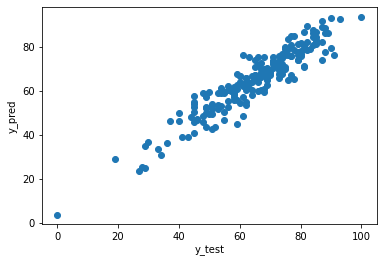

In [55]:
plt.scatter(y_test,test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<AxesSubplot:xlabel='math_score'>

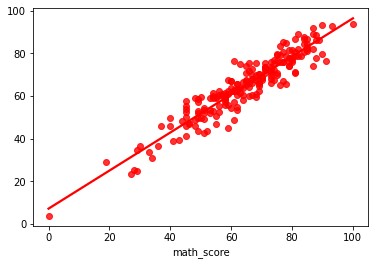

In [56]:
sns.regplot(x=y_test,y=test_pred,ci=None,color='red')

# Defrence Between y_test and predicted value

In [57]:
pred_df = pd.DataFrame({"Actual_value":y_test,"pred_value":test_pred,"Defrence":y_test-test_pred})
pred_df

,Actual_value,pred_value,Defrence
521,91,76.421875,14.578125
737,53,58.937500,-5.937500
740,80,76.921875,3.078125
660,74,76.953125,-2.953125
411,84,87.796875,-3.796875
...,...,...,...
408,52,43.531250,8.468750
332,62,62.281250,-0.281250
208,74,67.734375,6.265625
613,65,67.046875,-2.046875
